In [47]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pl
from prfpy.stimulus import PRFStimulus2D
from prfpy.model import Iso2DGaussianModel, Norm_Iso2DGaussianModel, DoG_Iso2DGaussianModel, CSS_Iso2DGaussianModel
from prfpy.fit import Iso2DGaussianFitter, Norm_Iso2DGaussianFitter, DoG_Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

This notebook shows a simple example of prfpy use

# Creating stimulus object

In [48]:
screen_size_cm=40
screen_distance_cm=200
design_matrix=np.zeros((50,50,100))
design_matrix[:,20:30,40:50] = 1
TR=1
task_lengths=[100]
task_names=['test']
late_iso_dict={'test':np.arange(40)}
normalize_integral_dx=False

prf_stim = PRFStimulus2D(screen_size_cm=screen_size_cm,
                             screen_distance_cm=screen_distance_cm,
                             design_matrix=design_matrix,
                             TR=TR,
                             task_lengths=task_lengths,
                             task_names=task_names,
                             late_iso_dict=late_iso_dict,
                             normalize_integral_dx=normalize_integral_dx)

# Gaussian model fit

## Creating Gaussian model and fitter objects

In [49]:
#only needed if filtering predictions
filter_type='dc'
filter_params={"first_modes_to_remove":3,
                         "last_modes_to_remove_percent":0,
                         "window_length":50,
                         "polyorder":3,
                         "highpass":True,
                         "add_mean":True}

filter_predictions=False

hrf=[1,4,0]

data = 3*np.random.rand(50,100)+0.01*np.sum(design_matrix, axis=(0,1))-1.5
#some kind of surround
data[:10,30:40] -= 2.5
data[:10,50:60] -= 2
data = np.roll(data,12)

normalize_RFs=False


gg = Iso2DGaussianModel(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=filter_predictions,
                          filter_type=filter_type,
                          filter_params=filter_params,
                          normalize_RFs=normalize_RFs)

gf = Iso2DGaussianFitter(data=data, model=gg, n_jobs=8)

## Gaussian grid fit

In [50]:
ecc_grid=np.linspace(0,10,10)
polar_grid=np.linspace(-np.pi,np.pi,10)
size_grid=np.linspace(1,10,10)
verbose=False
n_batches=8
fixed_grid_baseline=0
gauss_grid_bounds=[(0,1000)] #bound on prf amplitudes (only positive)

hrf_1_grid=np.linspace(0,10,10)
hrf_2_grid=np.linspace(0,0,1)

gf.grid_fit(ecc_grid=ecc_grid,
                polar_grid=polar_grid,
                size_grid=size_grid,
                verbose=verbose,
                n_batches=n_batches,
                fixed_grid_baseline=fixed_grid_baseline,
                grid_bounds=gauss_grid_bounds,
           hrf_1_grid=hrf_1_grid,
           hrf_2_grid=hrf_2_grid)

In [51]:
gf.gridsearch_params

array([[-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
         1.49386106e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.68832648e-02],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
         6.24846295e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.38818944e-03],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
         1.23798195e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.59332862e-02],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
         7.38432538e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.58188421e-03],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
         1.28050344e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.78855823e-02],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
         1.33300954e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.99719498e-02],
       [-0.00000000e+00, -0.000000

## Gaussian Iterative Fit

In [52]:
rsq_threshold=0.01
verbose=True
gauss_bounds = [(-1.5*10, 1.5*10),  # x
                (-1.5*10, 1.5*10),  # y
                (0.1, 1.5*5),  # prf size
                (0, 1000),  # prf amplitude
                (0, 0)]  # bold baseline
gauss_bounds += [(0,10),(0,0)] #hrf bounds. if want it fixed to some value, specify e.g. (4,4) (0,0)
constraints=None
xtol=1e-4
ftol=1e-4

gf.iterative_fit(rsq_threshold=rsq_threshold, verbose=verbose,
                         bounds=gauss_bounds,
                         constraints=constraints,
                             xtol=xtol,
                             ftol=xtol)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.10529D+02    |proj g|=  9.72022D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         2 variables are exactly at the bounds

At iterate    0    f=  2.81677D+02    |proj g|=  8.13100D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  4.41431D+02    |proj g|=  8.24230D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.82893D+02    |proj g|=  2.84217D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

/Users/marcoaqil/prfpy/prfpy/model.py:314: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:314: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:314: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.68132D+02    |proj g|=  7.95808D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.71385D+02    |proj g|=  9.43601D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.44496D+02    |proj g|=  3.32534D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.60324D+02    |proj g|=  2.38742D-04

At iterate    1    f=  2.33742D+02    |proj g|=  6.36646D-04

           * * *

Tit


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f=  2.44496D+02    |proj g|=  3.35376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     14      1     0     1   3.354D-04   2.445D+02
  F =   244.49585099581012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.52592D+02    |proj g|=  3.58114D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f=  2.24676D+02    |proj g|=  6.82121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     11      1     0     1   6.821D-04   2.247D+02
  F =   224.67551112612858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.96188D+02    |proj g|=  6.48015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


    5      1      9      1     0     1   6.025D-04   2.656D+02
  F =   265.59557391187980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.46071D+02    |proj g|=  6.42331D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1      6      1     0     1   6.423D-04   2.461D+02
  F =   246.07072460521772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.85293D+02  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f=  2.85293D+02    |proj g|=  4.49063D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     10      1     0     1   4.491D-04   2.853D+02
  F =   285.29282614933504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  3.15179D+02    |proj g|=  3.70619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    4.4s finished


In [53]:
gf.iterative_search_params

array([[ 6.77772305e-12,  6.77772305e-12,  1.00000000e+00,
         1.49386096e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.68832908e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.42753705e-12,  1.00000000e+00,
         1.23798183e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.59333046e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.28050333e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.78854728e-02],
       [-1.15111454e-12,  0.00000000e+00,  1.00000000e+00,
         1.33300953e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.99719676e-02],
       [ 0.00000000e+00,  0.000000

# DN model fit

## Create model and fitter objects

In [54]:
stimulus=prf_stim
hrf=[1,5,0]
filter_type='dc'
filter_params={"first_modes_to_remove":3,
                         "last_modes_to_remove_percent":0,
                         "window_length":50,
                         "polyorder":3,
                         "highpass":True,
                         "add_mean":True}

filter_predictions=False                                     
normalize_RFs=False

use_previous_gaussian_fitter_hrf=False #if true, will use hrf result from gauss fit at the grid stage instead of doing a grid fit for it

gg_norm = Norm_Iso2DGaussianModel(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=filter_predictions,
                                    filter_type=filter_type,
                                    filter_params=filter_params,                                       
                                    normalize_RFs=normalize_RFs)

gf_norm = Norm_Iso2DGaussianFitter(data=data,
                                   model=gg_norm,
                                   n_jobs=8,
                                   previous_gaussian_fitter=gf,
                                  use_previous_gaussian_fitter_hrf=use_previous_gaussian_fitter_hrf) 

## DN model grid fit

In [55]:
norm_grid_bounds = [(0,1000),(0,1000)] #only prf amplitudes between 0 and 1000, only neural baseline values between 0 and 1000

gf_norm.grid_fit(surround_amplitude_grid=np.linspace(0,10,5),
             surround_size_grid=np.linspace(1,10,5),
             neural_baseline_grid=np.linspace(0,10,5),
             surround_baseline_grid=np.linspace(1,10,5),
             verbose=verbose,
             n_batches=8,
             rsq_threshold=rsq_threshold,
             fixed_grid_baseline=fixed_grid_baseline,
             grid_bounds=norm_grid_bounds,
             hrf_1_grid=np.linspace(0,10,5),
             hrf_2_grid=np.linspace(0,0,1))

Each batch contains approx. 6 voxels.


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/Users/marcoaqil/prfpy/prfpy/model.py:550: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:550: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:550: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:550: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:550: FutureWarning: elementwise comparison failed; returning scalar instead, but in the fut

## DN Iterative Fit

In [56]:
norm_bounds =  [(-1.5*10, 1.5*10),  # x
                (-1.5*10, 1.5*10),  # y
                (0.1, 1.5*5),  # prf size
                (0, 1000),  # prf amplitude
                (0, 0),  # bold baseline
                (0, 1000),  # surround amplitude
                (0.1, 3*5),  # surround size
                (0, 1000),  # neural baseline
                (1e-6, 1000)]  # surround baseline
norm_bounds += [(0,10),(0,0)]
constraints_norm = None

gf_norm.iterative_fit(rsq_threshold=rsq_threshold, verbose=verbose,
                               bounds=norm_bounds,
                               constraints=constraints_norm,
                               xtol=xtol,
                               ftol=ftol)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.91161D+02    |proj g|=  2.27374D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.03198D+02    |proj g|=  3.97904D-05


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.99497D+02    |proj g|=  2.84217D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.47743D+02    |proj g|=  1.70530D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.01462D+02    |proj g|=  2.27374D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.71695D+02    |proj g|=  2.27374D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     


At iterate    1    f=  2.60324D+02    |proj g|=  2.27374D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1      3      1     0     3   2.274D-05   2.603D+02
  F =   260.32401329885425     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.71385D+02    |proj g|=  7.44649D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f=  2.33477D+02    |proj g|=  7.21911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1      4      1     0     3   7.219D-04   2.335D+02
  F =   233.47650698716393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.65878D+02    |proj g|=  8.18545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  2.52808D+02    |proj g|=  7.75913D-04

At iterate    1    f=  2.96188D+02    |proj g|=  5.91172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1     11      1     0     3   5.912D-04   2.962D+02
  F =   296.18784400524231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.74837D+02    |proj g|=  6.08225D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  3.07107D+02    |proj g|=  1.04592D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  2.52780D+02    |proj g|=  2.77964D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  2.44800D+02    |proj g|=  4.54573D-03

At iterate    1    f=  2.52808D+02    |proj g|=  6.84963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final general


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         3 variables are exactly at the bounds

At iterate    0    f=  2.94353D+02    |proj g|=  7.21911D-04

At iterate    1    f=  2.44800D+02    |proj g|=  4.54573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1      6      2     0     4   4.546D-03   2.448D+02
  F =   244.79988681505861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.71009D+02    |proj g|=  5.68434D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f=  2.85293D+02    |proj g|=  4.09273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1      8      1     0     3   4.093D-04   2.853D+02
  F =   285.29282614933510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  2.52780D+02    |proj g|=  2.75975D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    3.4s finished


In [57]:
gf_norm.iterative_search_params[:,-1] - gf.iterative_search_params[:,-1]

array([ 3.01597773e-01,  0.00000000e+00,  3.21732095e-01,  0.00000000e+00,
        3.53989899e-01,  2.76299237e-01,  0.00000000e+00,  3.46818194e-01,
        0.00000000e+00,  0.00000000e+00,  1.52988733e-13,  4.17252306e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.22044605e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.11022302e-16, -1.11022302e-16,
        2.23820962e-13,  0.00000000e+00,  1.56444454e-02,  1.11022302e-16,
        2.22044605e-16,  0.00000000e+00,  1.11022302e-16, -3.33066907e-16,
        2.22044605e-16, -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
       -1.11022302e-16,  2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.11022302e-16,  0.00000000e+00,  3.33066907e-16,
       -1.11022302e-16,  3.33066907e-16,  3.88957915e-02,  0.00000000e+00,
        0.00000000e+00,  9.10388638e-03])

In [59]:
gf_norm.iterative_search_params[0]

array([6.77772305e-12, 6.77772305e-12, 1.00000001e+00, 8.55075438e-01,
       0.00000000e+00, 2.50000000e+00, 9.99999990e-01, 2.13768852e+00,
       1.00000007e+00, 1.00000000e+01, 0.00000000e+00, 3.38481063e-01])

<IPython.core.display.Javascript object>


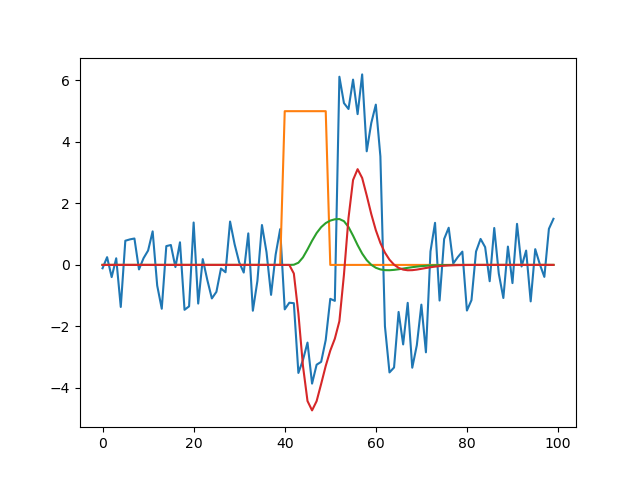

/Users/marcoaqil/prfpy/prfpy/model.py:314: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:550: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':


In [58]:
pl.figure()
pl.plot(data[0])
pl.plot(np.sum(design_matrix, axis=(0,1))/100)
pl.plot(gg.return_prediction(*list(gf.iterative_search_params[0,:-1])).T)
pl.plot(gg_norm.return_prediction(*list(gf_norm.iterative_search_params[0,:-1])).T)

# Crossvalidate

In [20]:
test_data = 3*np.random.rand(50,100)+0.01*np.sum(design_matrix, axis=(0,1))-1.5
np.roll(test_data,6)

test_stimulus = prf_stim

single_hrf = False

gf.crossvalidate_fit(test_data=test_data,
                     test_stimulus=test_stimulus,
                     single_hrf=single_hrf)

gf_norm.crossvalidate_fit(test_data,
                        test_stimulus=test_stimulus,
                        single_hrf=single_hrf)

/Users/marcoaqil/prfpy/prfpy/model.py:314: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/Users/marcoaqil/prfpy/prfpy/model.py:545: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
